<a href="https://colab.research.google.com/github/AkshayMinde/Bike-Demand-Prediction/blob/main/Bike_Demand_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
bikes = pd.read_csv('hour.csv')

In [ ]:
df = bikes.copy()
df = df.drop(['index', 'date','casual', 'registered'], axis=1)

In [ ]:
df.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

<Figure size 3600x720 with 0 Axes>

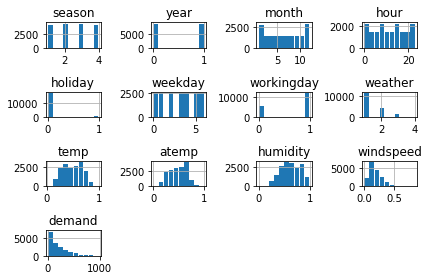

In [ ]:
plt.figure(figsize=(50,10))
df.hist(rwidth=0.9)
plt.tight_layout()
plt.show()

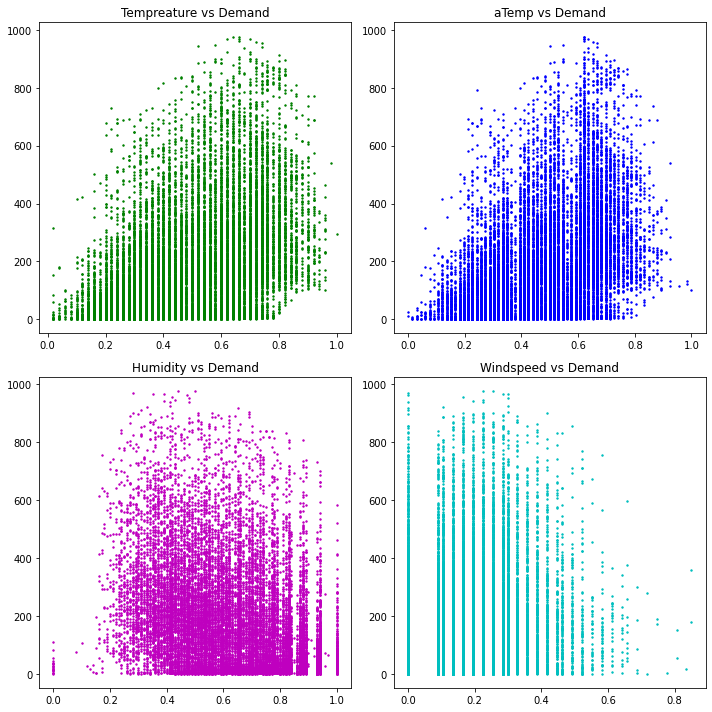

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2, 1)
plt.title('Tempreature vs Demand')
plt.scatter(df['temp'], df['demand'], s=2, c='g')

plt.subplot(2,2, 2)
plt.title('aTemp vs Demand')
plt.scatter(df['atemp'], df['demand'], s=2, c='b')

plt.subplot(2,2, 3)
plt.title('Humidity vs Demand')
plt.scatter(df['humidity'], df['demand'], s=2, c='m')

plt.subplot(2,2, 4)
plt.title('Windspeed vs Demand')
plt.scatter(df['windspeed'], df['demand'], s=2, c='c')

plt.tight_layout()
plt.show()

In [ ]:
# Categorical features Vs Demand


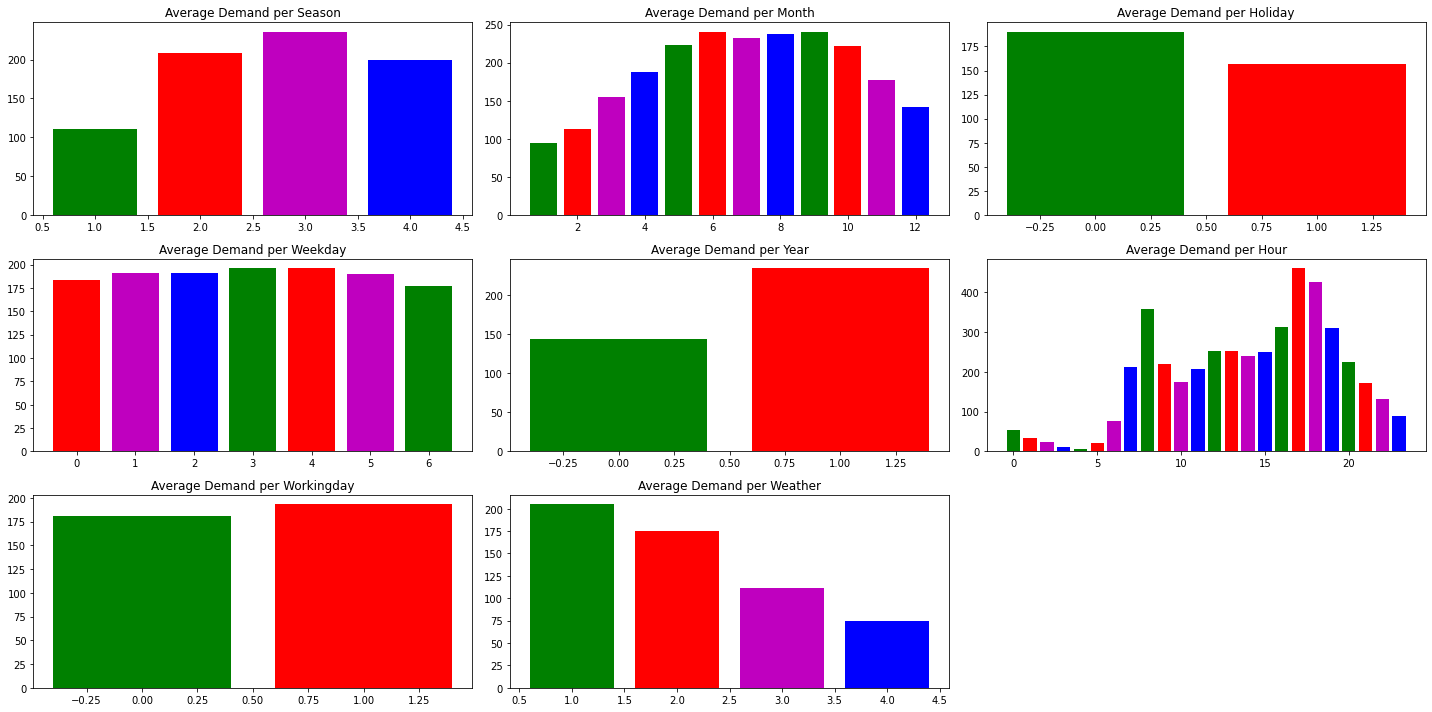

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(3,3, 1)
plt.title('Average Demand per Season')
cat_list = df['season'].unique()
cat_avg = df.groupby('season').mean()['demand']
colours = ['g', 'r', 'm', 'b']
plt.bar(cat_list,cat_avg, color=colours)

plt.subplot(3,3, 2)
plt.title('Average Demand per Month')
cat_list = df['month'].unique()
cat_avg = df.groupby('month').mean()['demand']
plt.bar(cat_list,cat_avg, color=colours)

plt.subplot(3,3, 3)
plt.title('Average Demand per Holiday')
cat_list = df['holiday'].unique()
cat_avg = df.groupby('holiday').mean()['demand']
plt.bar(cat_list,cat_avg, color=colours)

plt.subplot(3,3, 4)
plt.title('Average Demand per Weekday')
cat_list = df['weekday'].unique()
cat_avg = df.groupby('weekday').mean()['demand']
plt.bar(cat_list,cat_avg, color=colours)

plt.subplot(3,3, 5)
plt.title('Average Demand per Year')
cat_list = df['year'].unique()
cat_avg = df.groupby('year').mean()['demand']
plt.bar(cat_list,cat_avg, color=colours)

plt.subplot(3,3, 6)
plt.title('Average Demand per Hour')
cat_list = df['hour'].unique()
cat_avg = df.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_avg, color=colours)

plt.subplot(3,3, 7)
plt.title('Average Demand per Workingday')
cat_list = df['workingday'].unique()
cat_avg = df.groupby('workingday').mean()['demand']
plt.bar(cat_list,cat_avg, color=colours)

plt.subplot(3,3, 8)
plt.title('Average Demand per Weather')
cat_list = df['weather'].unique()
cat_avg = df.groupby('weather').mean()['demand']
plt.bar(cat_list,cat_avg, color=colours)

plt.tight_layout()
plt.show()

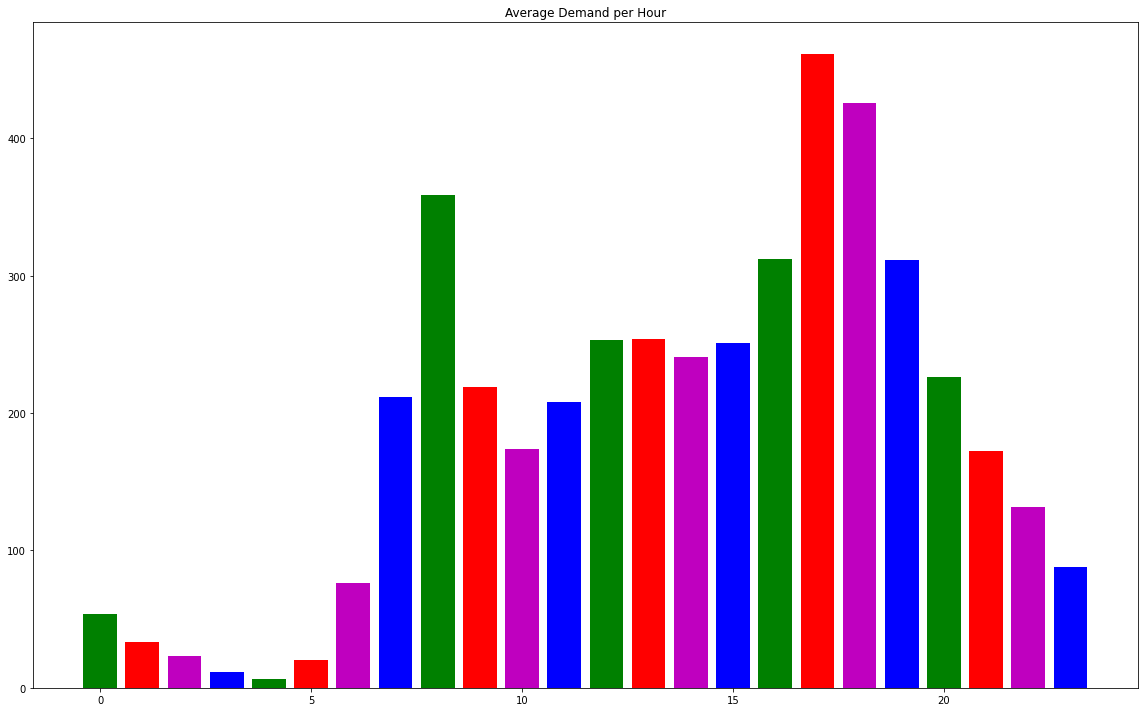

In [ ]:
plt.figure(figsize=(16,10))
plt.title('Average Demand per Hour')
cat_list = df['hour'].unique()
cat_avg = df.groupby('hour').mean()['demand']
plt.bar(cat_list,cat_avg, color=colours)
plt.tight_layout()
plt.show()

In [ ]:
df['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [ ]:
df['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [ ]:
co_relation = df[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()
co_relation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [ ]:
df = df.drop(['atemp', 'weekday', 'year', 'workingday', 'windspeed'], axis=1)
df.shape

(17379, 8)

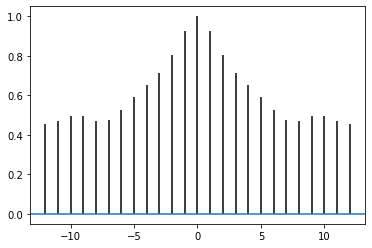

In [ ]:
df1 = pd.to_numeric(df['demand'], downcast = 'float')
plt.acorr(df1, maxlags=12)
plt.show()

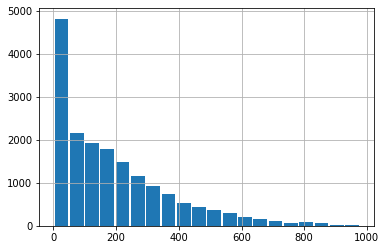

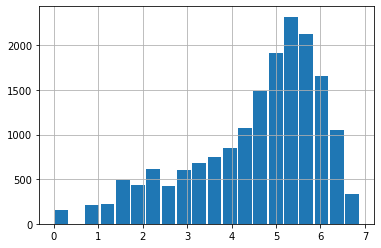

In [ ]:
df1 = df['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)

In [ ]:
df['demand'] = np.log(df['demand'])

In [ ]:
t_1 = df['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = df['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = df['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

In [ ]:
df_lag = pd.concat([df, t_1, t_2, t_3], axis=1)

In [ ]:
df_lag = df_lag.dropna()

In [ ]:
df_lag['season'] = df_lag['season'].astype('category')
df_lag['holiday'] = df_lag['holiday'].astype('category')
df_lag['weather'] = df_lag['weather'].astype('category')
df_lag['month'] = df_lag['month'].astype('category')
df_lag['hour'] = df_lag['hour'].astype('category')

In [ ]:
df_lag = pd.get_dummies(df_lag, drop_first=True)

In [ ]:
df_lag

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
Y = df_lag[['demand']]
X = df_lag.drop(['demand'], axis=1)

In [ ]:
tr_size = int(0.7 * len(X))

In [ ]:
X_train = X.values[0:tr_size]
X_test = X.values[tr_size: len(X)]

Y_train = Y.values[0:tr_size]
Y_test = Y.values[tr_size: len(Y)]

In [ ]:
std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
r2_train = std_reg.score(X_train, Y_train)
r2_test = std_reg.score(X_test, Y_test)
print(r2_train)
print(r2_test)

0.9195240591465778
0.9287151360253385


In [ ]:
y_predict = std_reg.predict(X_test)

In [ ]:
rmse = math.sqrt(mean_squared_error(Y_test,y_predict))
rmse

0.38098800498170443